# Problem 04.1:
### Previously in the ```Problem 03.2``` we resolved the problem about White Wine Classification and now we'll resolve the same problem but with Regression. 
### *Now, we'll use the KNN algorithm for regression*.   

* Dataset: [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)
* The objective of this problem is to classify the wine quality.
- This dataset belogs to:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: 
  * [@Elsevier](http://dx.doi.org/10.1016/j.dss.2009.05.016)
  * [Pre-press (pdf)](http://www3.dsi.uminho.pt/pcortez/winequality09.pdf)
  * [bib](http://www3.dsi.uminho.pt/pcortez/dss09.bib)

## 1. Imports: 

In [1]:
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)

filename = '/media/j/hd/data-sets/ml/winequality-white.csv'
white_df = pd.read_csv(filename, sep = ';')

In [2]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2. Splitting and Stratifying data:

In [3]:
white_df['quality'].value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

#### Showing the distribuition of classes:

In [4]:
y = white_df.pop('quality')
X = white_df.copy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, stratify=y) # Using Scikit to split data

## 4. Data visualization and manipulation:

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 902 to 89
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3428 non-null   float64
 1   volatile acidity      3428 non-null   float64
 2   citric acid           3428 non-null   float64
 3   residual sugar        3428 non-null   float64
 4   chlorides             3428 non-null   float64
 5   free sulfur dioxide   3428 non-null   float64
 6   total sulfur dioxide  3428 non-null   float64
 7   density               3428 non-null   float64
 8   pH                    3428 non-null   float64
 9   sulphates             3428 non-null   float64
 10  alcohol               3428 non-null   float64
dtypes: float64(11)
memory usage: 321.4 KB


In [7]:
y_train

902     5
1128    5
1076    6
2640    6
2221    6
       ..
71      5
1214    6
751     6
2192    6
89      6
Name: quality, Length: 3428, dtype: int64

In [8]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000
mean,6.853544,0.276971,0.333256,6.429653,0.045833,35.011231,137.985268,0.994062,3.186435,0.491368,10.495821
std,0.830070,0.099831,0.119521,5.129153,0.021377,16.977485,42.498090,0.003023,0.150442,0.113482,1.226156
min,3.800000,0.080000,0.000000,0.700000,0.013000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991777,3.080000,0.410000,9.400000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993800,3.180000,0.480000,10.400000
75%,7.300000,0.320000,0.380000,10.000000,0.050000,45.000000,167.000000,0.996200,3.280000,0.550000,11.400000
max,11.800000,1.100000,1.660000,65.800000,0.301000,289.000000,440.000000,1.038980,3.800000,1.080000,14.050000


### Insights:

#### The data variation is different but there are some features data the variation is big, and they are:	
- ```volatile acidity```: The variation is (0.08,1.1]
- ```residual sugar```: The vary is (0.6,65.8]
- ```chlorides```: The vary is (0.012,0.34]
- ```free sulfur dioxide```: The vary is (3,289]
- ```total sulfur dioxide```: The vary is (18,440]
- ```sulphates```: The vary is (0.23,1.08]

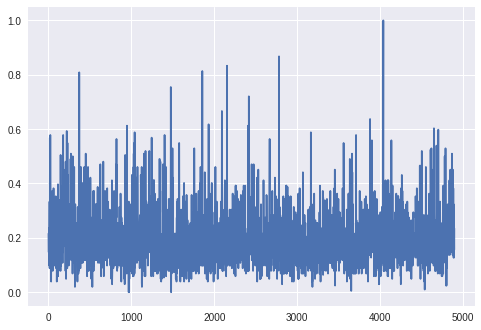

In [46]:
X_train['volatile acidity'].sort_index().plot()
plt.style.use("seaborn")
plt.show()

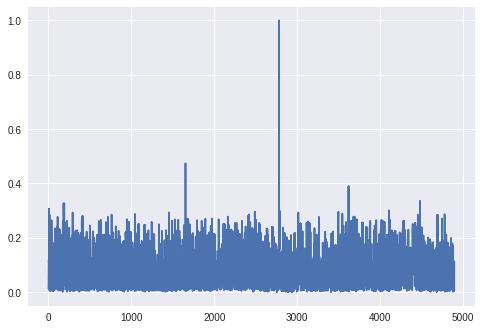

In [45]:
X_train['residual sugar'].sort_index().plot()
plt.style.use("seaborn")
plt.show()

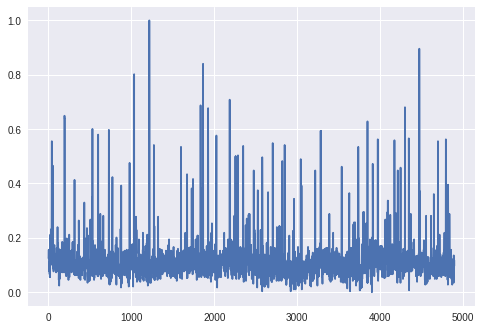

In [44]:
X_train['chlorides'].sort_index().plot()
plt.style.use("seaborn")
plt.show()

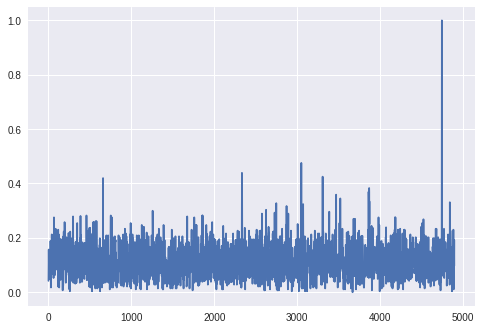

In [43]:
X_train['free sulfur dioxide'].sort_index().plot()
plt.style.use("seaborn")
plt.show()

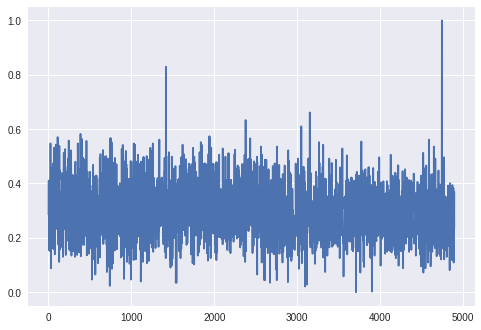

In [42]:
X_train['total sulfur dioxide'].sort_index().plot()
plt.style.use("seaborn")
plt.show()

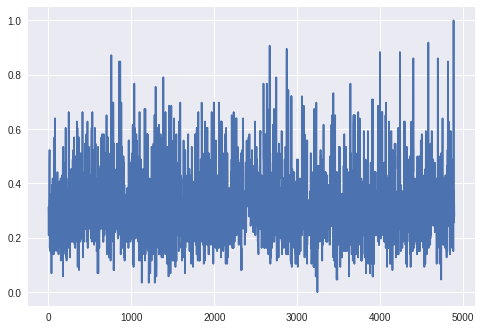

In [41]:
X_train['sulphates'].sort_index().plot()
plt.style.use("seaborn")
plt.show()

#### Plotting correlation to descart some feature:

In [15]:
X_train.iloc[:,:].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.039280,0.303650,0.093829,0.037947,-0.053779,0.098384,0.268688,-0.412604,-0.004339,-0.116975
volatile acidity,-0.039280,1.000000,-0.158565,0.062575,0.068990,-0.117509,0.076322,0.034669,-0.015692,-0.040423,0.063002
citric acid,0.303650,-0.158565,1.000000,0.086588,0.125448,0.098840,0.126652,0.148801,-0.173406,0.069042,-0.075537
residual sugar,0.093829,0.062575,0.086588,1.000000,0.079837,0.300148,0.405465,0.839803,-0.205355,-0.032825,-0.445614
chlorides,0.037947,0.068990,0.125448,0.079837,1.000000,0.092335,0.191480,0.253954,-0.100277,0.014563,-0.364198
free sulfur dioxide,-0.053779,-0.117509,0.098840,0.300148,0.092335,1.000000,0.606858,0.294956,-0.000152,0.051728,-0.255125
total sulfur dioxide,0.098384,0.076322,0.126652,0.405465,0.191480,0.606858,1.000000,0.530070,0.000796,0.132016,-0.451459
density,0.268688,0.034669,0.148801,0.839803,0.253954,0.294956,0.530070,1.000000,-0.091230,0.071803,-0.770991
pH,-0.412604,-0.015692,-0.173406,-0.205355,-0.100277,-0.000152,0.000796,-0.091230,1.000000,0.159390,0.111485
sulphates,-0.004339,-0.040423,0.069042,-0.032825,0.014563,0.051728,0.132016,0.071803,0.159390,1.000000,-0.013275


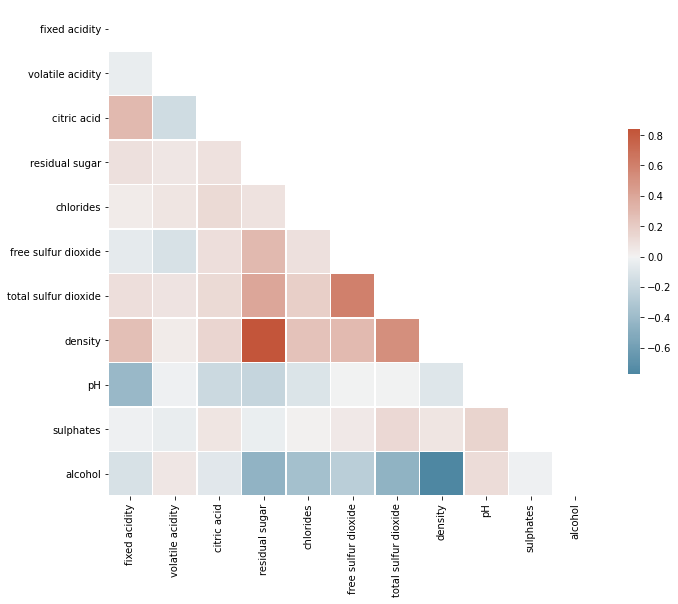

In [16]:
corr_white_wine = X_train.iloc[:,:].corr()

mask = np.triu(np.ones_like(corr_white_wine, dtype=bool)) # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(11, 9)) # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap
sns.heatmap(corr_white_wine, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}); # Draw the heatmap with the mask and correct aspect ratio

#### Let's normalize the columns that we identify previously

##### Not normalized:

In [17]:
X_train_unnormalized = X_train.copy()
X_test_unnormalized = X_test.copy()
y_train_unnormalized = y_train.copy()
y_test_unnormalized = y_test.copy()

##### Normalized - all:

In [18]:
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()
y_train_normalized = y_train.copy()
y_test_normalized = y_test.copy()

red_2_min_max_scaled = X_train_normalized

column_1 = 'total sulfur dioxide'
column_2 = 'free sulfur dioxide'
column_3 = 'volatile acidity'
column_4 = 'residual sugar'
column_5 = 'chlorides'
column_6 = 'sulphates'
column_7 = 'fixed acidity'
column_8 = 'citric acid'
column_9 = 'density'
column_10 = 'pH'
column_11 = 'alcohol'

red_2_min_max_scaled[column_1] = (red_2_min_max_scaled[column_1] - red_2_min_max_scaled[column_1].min()) / (red_2_min_max_scaled[column_1].max() - red_2_min_max_scaled[column_1].min())    
red_2_min_max_scaled[column_2] = (red_2_min_max_scaled[column_2] - red_2_min_max_scaled[column_2].min()) / (red_2_min_max_scaled[column_2].max() - red_2_min_max_scaled[column_2].min())    
red_2_min_max_scaled[column_3] = (red_2_min_max_scaled[column_3] - red_2_min_max_scaled[column_3].min()) / (red_2_min_max_scaled[column_3].max() - red_2_min_max_scaled[column_3].min())    
red_2_min_max_scaled[column_4] = (red_2_min_max_scaled[column_4] - red_2_min_max_scaled[column_4].min()) / (red_2_min_max_scaled[column_4].max() - red_2_min_max_scaled[column_4].min())    
red_2_min_max_scaled[column_5] = (red_2_min_max_scaled[column_5] - red_2_min_max_scaled[column_5].min()) / (red_2_min_max_scaled[column_5].max() - red_2_min_max_scaled[column_5].min())    
red_2_min_max_scaled[column_6] = (red_2_min_max_scaled[column_6] - red_2_min_max_scaled[column_6].min()) / (red_2_min_max_scaled[column_6].max() - red_2_min_max_scaled[column_6].min()) 
red_2_min_max_scaled[column_7] = (red_2_min_max_scaled[column_7] - red_2_min_max_scaled[column_7].min()) / (red_2_min_max_scaled[column_7].max() - red_2_min_max_scaled[column_7].min())    
red_2_min_max_scaled[column_8] = (red_2_min_max_scaled[column_8] - red_2_min_max_scaled[column_8].min()) / (red_2_min_max_scaled[column_8].max() - red_2_min_max_scaled[column_8].min())    
red_2_min_max_scaled[column_9] = (red_2_min_max_scaled[column_9] - red_2_min_max_scaled[column_9].min()) / (red_2_min_max_scaled[column_9].max() - red_2_min_max_scaled[column_9].min())    
red_2_min_max_scaled[column_10] = (red_2_min_max_scaled[column_10] - red_2_min_max_scaled[column_10].min()) / (red_2_min_max_scaled[column_10].max() - red_2_min_max_scaled[column_10].min())    
red_2_min_max_scaled[column_11] = (red_2_min_max_scaled[column_11] - red_2_min_max_scaled[column_11].min()) / (red_2_min_max_scaled[column_11].max() - red_2_min_max_scaled[column_11].min()) 


##### Normalized - part:

In [19]:
red_1_min_max_scaled = X_train # Shallow copy
  
# Apply normalization techniques because these above distribuition aren't normal (if it as normal we could use standardization), by columns selected.

column_1 = 'total sulfur dioxide'
column_2 = 'free sulfur dioxide'
column_3 = 'volatile acidity'
column_4 = 'residual sugar'
column_5 = 'chlorides'
column_6 = 'sulphates'

red_1_min_max_scaled[column_1] = (red_1_min_max_scaled[column_1] - red_1_min_max_scaled[column_1].min()) / (red_1_min_max_scaled[column_1].max() - red_1_min_max_scaled[column_1].min())    
red_1_min_max_scaled[column_2] = (red_1_min_max_scaled[column_2] - red_1_min_max_scaled[column_2].min()) / (red_1_min_max_scaled[column_2].max() - red_1_min_max_scaled[column_2].min())    
red_1_min_max_scaled[column_3] = (red_1_min_max_scaled[column_3] - red_1_min_max_scaled[column_3].min()) / (red_1_min_max_scaled[column_3].max() - red_1_min_max_scaled[column_3].min())    
red_1_min_max_scaled[column_4] = (red_1_min_max_scaled[column_4] - red_1_min_max_scaled[column_4].min()) / (red_1_min_max_scaled[column_4].max() - red_1_min_max_scaled[column_4].min())    
red_1_min_max_scaled[column_5] = (red_1_min_max_scaled[column_5] - red_1_min_max_scaled[column_5].min()) / (red_1_min_max_scaled[column_5].max() - red_1_min_max_scaled[column_5].min())    
red_1_min_max_scaled[column_6] = (red_1_min_max_scaled[column_6] - red_1_min_max_scaled[column_6].min()) / (red_1_min_max_scaled[column_6].max() - red_1_min_max_scaled[column_6].min()) 


# view normalized data
display(red_1_min_max_scaled)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
902,6.1,0.196078,0.35,0.185868,0.121528,0.212544,0.510441,0.99750,3.08,0.209302,8.9
1128,5.7,0.019608,0.27,0.009217,0.118056,0.066202,0.211137,0.99280,3.27,0.279070,9.5
1076,7.5,0.196078,0.33,0.107527,0.121528,0.139373,0.396752,0.99740,3.37,0.430233,10.1
2640,7.4,0.117647,0.37,0.007680,0.052083,0.090592,0.185615,0.99132,3.14,0.453488,11.8
2221,8.5,0.196078,0.34,0.201229,0.097222,0.104530,0.352668,0.99810,3.13,0.209302,9.9
...,...,...,...,...,...,...,...,...,...,...,...
71,6.8,0.215686,0.23,0.059908,0.166667,0.168990,0.532483,0.99580,3.32,0.441860,9.5
1214,9.7,0.156863,0.45,0.007680,0.069444,0.031359,0.116009,0.99260,2.74,0.290698,10.8
751,6.9,0.117647,0.50,0.142857,0.079861,0.264808,0.366589,0.99640,3.15,0.383721,10.2
2192,7.9,0.196078,0.41,0.064516,0.156250,0.101045,0.334107,0.99660,3.27,0.337209,9.7


In [20]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
902,6.1,0.196078,0.35,0.185868,0.121528,0.212544,0.510441,0.99750,3.08,0.209302,8.9
1128,5.7,0.019608,0.27,0.009217,0.118056,0.066202,0.211137,0.99280,3.27,0.279070,9.5
1076,7.5,0.196078,0.33,0.107527,0.121528,0.139373,0.396752,0.99740,3.37,0.430233,10.1
2640,7.4,0.117647,0.37,0.007680,0.052083,0.090592,0.185615,0.99132,3.14,0.453488,11.8
2221,8.5,0.196078,0.34,0.201229,0.097222,0.104530,0.352668,0.99810,3.13,0.209302,9.9


In [21]:
y_train.value_counts().sort_index()

3      14
4     114
5    1020
6    1538
7     616
8     122
9       4
Name: quality, dtype: int64

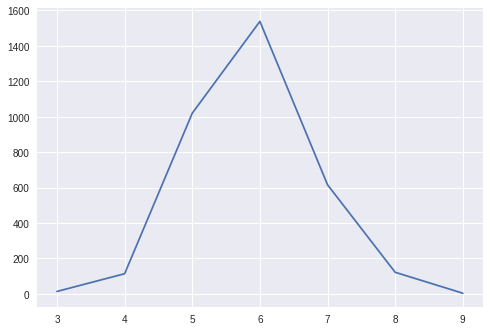

In [40]:
(y_train.value_counts().sort_index()).plot()
plt.style.use("seaborn")
plt.show()

## 5. Training our model:

### Feature engineering of X_test:

In [23]:
red_2_min_max_scaled = X_test 

column_1 = 'total sulfur dioxide'
column_2 = 'free sulfur dioxide'
column_3 = 'volatile acidity'
column_4 = 'residual sugar'
column_5 = 'chlorides'
column_6 = 'sulphates'

red_2_min_max_scaled[column_1] = (red_2_min_max_scaled[column_1] - red_2_min_max_scaled[column_1].min()) / (red_2_min_max_scaled[column_1].max() - red_2_min_max_scaled[column_1].min())    
red_2_min_max_scaled[column_2] = (red_2_min_max_scaled[column_2] - red_2_min_max_scaled[column_2].min()) / (red_2_min_max_scaled[column_2].max() - red_2_min_max_scaled[column_2].min())    
red_2_min_max_scaled[column_3] = (red_2_min_max_scaled[column_3] - red_2_min_max_scaled[column_3].min()) / (red_2_min_max_scaled[column_3].max() - red_2_min_max_scaled[column_3].min())
red_2_min_max_scaled[column_4] = (red_2_min_max_scaled[column_4] - red_2_min_max_scaled[column_4].min()) / (red_2_min_max_scaled[column_4].max() - red_2_min_max_scaled[column_4].min())    
red_2_min_max_scaled[column_5] = (red_2_min_max_scaled[column_5] - red_2_min_max_scaled[column_5].min()) / (red_2_min_max_scaled[column_5].max() - red_2_min_max_scaled[column_5].min())    
red_2_min_max_scaled[column_6] = (red_2_min_max_scaled[column_6] - red_2_min_max_scaled[column_6].min()) / (red_2_min_max_scaled[column_6].max() - red_2_min_max_scaled[column_6].min()) 

### Aplying the algorithm:

#### Normalized:

In [24]:
knn_results = {'neighbors':[],'MAE':[],'MSE':[],'RMSE':[], 'standart deviation':[]}

for i in range(1,14,2):
    model_regressor = neighbors.KNeighborsRegressor(n_neighbors = i, weights = 'distance') # Selecting the amount of neighbors
    model_regressor.fit(X_train, y_train)

    pred = model_regressor.predict(X_test)
    #pred = np.round(pred) # With round function the results is worse
    knn_results['standart deviation'].append(np.std(pred))
    knn_results['neighbors'].append(i)
    knn_results['RMSE'].append(mean_squared_error(y_test,pred, squared=False))
    knn_results['MSE'].append(mean_squared_error(y_test,pred))
    knn_results['MAE'].append(mean_absolute_error(y_test,pred))

#### All Normalized:

In [25]:
knn_results_all = {'neighbors':[],'MAE':[],'MSE':[],'RMSE':[], 'standart deviation':[]}

for i in range(1,14,2):
    model_regressor = neighbors.KNeighborsRegressor(n_neighbors = i, weights = 'distance') # Selecting the amount of neighbors
    model_regressor.fit(X_train_normalized, y_train_normalized)

    pred = model_regressor.predict(X_test_normalized)
    #pred = np.round(pred) # With round function the results is worse
    knn_results_all['standart deviation'].append(np.std(pred))
    knn_results_all['neighbors'].append(i)
    knn_results_all['RMSE'].append(mean_squared_error(y_test,pred, squared=False))
    knn_results_all['MSE'].append(mean_squared_error(y_test,pred))
    knn_results_all['MAE'].append(mean_absolute_error(y_test,pred))

#### Unnormalized:

In [26]:
knn_results_un = {'neighbors':[],'MAE':[],'MSE':[],'RMSE':[], 'standart deviation':[]}

for i in range(1,14,2):
    model_regressor = neighbors.KNeighborsRegressor(n_neighbors = i, weights = 'distance') # Selecting the amount of neighbors
    model_regressor.fit(X_train_unnormalized, y_train_unnormalized)

    pred = model_regressor.predict(X_test_unnormalized)
    #pred = np.round(pred) # With round function the results is worse
    knn_results_un['standart deviation'].append(np.std(pred))
    knn_results_un['neighbors'].append(i)
    knn_results_un['RMSE'].append(mean_squared_error(y_test,pred, squared=False))
    knn_results_un['MSE'].append(mean_squared_error(y_test,pred))
    knn_results_un['MAE'].append(mean_absolute_error(y_test,pred))

#### Normalized:

In [27]:
knn_results = pd.DataFrame.from_dict(knn_results)
knn_results

,neighbors,MAE,MSE,RMSE,standart deviation
0,1,0.488435,0.666667,0.816497,0.862969
1,3,0.542965,0.530359,0.728258,0.680281
2,5,0.552747,0.523961,0.723851,0.624284
3,7,0.556614,0.522543,0.722871,0.591181
4,9,0.565088,0.529730,0.727825,0.573712
5,11,0.567688,0.530018,0.728023,0.555080
6,13,0.568372,0.529832,0.727895,0.543801


In [28]:
knn_results.iloc[:,1:].min()

MAE                   0.488435
MSE                   0.522543
RMSE                  0.722871
standart deviation    0.543801
dtype: float64

#### Just seeing to the RMSE metric and standart deviation:

In [29]:
knn_results[knn_results['RMSE'] > knn_results['standart deviation']]

,neighbors,MAE,MSE,RMSE,standart deviation
1,3,0.542965,0.530359,0.728258,0.680281
2,5,0.552747,0.523961,0.723851,0.624284
3,7,0.556614,0.522543,0.722871,0.591181
4,9,0.565088,0.529730,0.727825,0.573712
5,11,0.567688,0.530018,0.728023,0.555080
6,13,0.568372,0.529832,0.727895,0.543801


#### Unnormalized:

In [30]:
knn_results_un = pd.DataFrame.from_dict(knn_results_un)
knn_results_un

,neighbors,MAE,MSE,RMSE,standart deviation
0,1,0.547619,0.803401,0.896327,0.873127
1,3,0.509113,0.594139,0.770804,0.705370
2,5,0.489908,0.539992,0.734841,0.653613
3,7,0.483511,0.522704,0.722983,0.631166
4,9,0.477511,0.511141,0.714941,0.615682
5,11,0.477414,0.507687,0.712522,0.602892
6,13,0.477391,0.501527,0.708185,0.592289


In [31]:
knn_results_un.iloc[:,1:].min()

MAE                   0.477391
MSE                   0.501527
RMSE                  0.708185
standart deviation    0.592289
dtype: float64

#### Just seeing to the RMSE metric and standart deviation:

In [32]:
knn_results_un[knn_results_un['RMSE'] > knn_results_un['standart deviation']]

,neighbors,MAE,MSE,RMSE,standart deviation
0,1,0.547619,0.803401,0.896327,0.873127
1,3,0.509113,0.594139,0.770804,0.705370
2,5,0.489908,0.539992,0.734841,0.653613
3,7,0.483511,0.522704,0.722983,0.631166
4,9,0.477511,0.511141,0.714941,0.615682
5,11,0.477414,0.507687,0.712522,0.602892
6,13,0.477391,0.501527,0.708185,0.592289


#### All normalized:

In [33]:
knn_results_all = pd.DataFrame.from_dict(knn_results_all)
knn_results_all

,neighbors,MAE,MSE,RMSE,standart deviation
0,1,2.877551,9.062585,3.010413,1.764231e-16
1,3,2.085172,5.169768,2.273712,3.049628e-01
2,5,1.702332,3.605721,1.898874,3.445007e-02
3,7,1.551306,3.123319,1.767291,1.337205e-01
4,9,1.399321,2.713595,1.647299,2.052907e-01
5,11,1.273330,2.328300,1.525877,2.056762e-01
6,13,1.173325,2.037513,1.427415,1.715549e-01


In [34]:
knn_results_all.iloc[:,1:].min()

MAE                   1.173325e+00
MSE                   2.037513e+00
RMSE                  1.427415e+00
standart deviation    1.764231e-16
dtype: float64

#### Just seeing to the RMSE metric and standart deviation:

In [35]:
knn_results_all[knn_results_all['RMSE'] > knn_results_all['standart deviation']]

,neighbors,MAE,MSE,RMSE,standart deviation
0,1,2.877551,9.062585,3.010413,1.764231e-16
1,3,2.085172,5.169768,2.273712,3.049628e-01
2,5,1.702332,3.605721,1.898874,3.445007e-02
3,7,1.551306,3.123319,1.767291,1.337205e-01
4,9,1.399321,2.713595,1.647299,2.052907e-01
5,11,1.273330,2.328300,1.525877,2.056762e-01
6,13,1.173325,2.037513,1.427415,1.715549e-01


## 6. Conclusion:

### Part - Normalized:

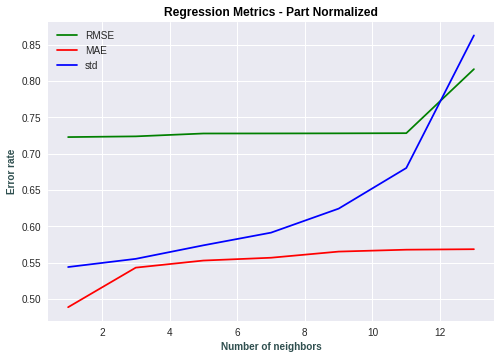

In [39]:
x = np.arange(1,14,2)
plt.title('Regression Metrics - Part Normalized', fontweight='bold', fontsize=12, color='black')
plt.plot(x, knn_results['RMSE'].sort_values(), c = 'green', label = 'RMSE')
plt.plot(x, knn_results['MAE'].sort_values(), c = 'red', label = 'MAE')
plt.plot(x, knn_results['standart deviation'].sort_values(), c = 'blue', label = 'std')
# plt.plot(x, knn_results['MSE'].sort_values(), c = 'blue', label = 'MSE') 
# Only the use of RMSE was chosen
#plt.axvline(x = 7, c = 'gray')
#plt.axvline(x = 1, c = 'gray')
plt.legend()
plt.ylabel('Error rate',fontweight='bold', fontsize=10, color='darkslategrey')
plt.xlabel('Number of neighbors',fontweight='bold', fontsize=10, color='darkslategrey')
plt.style.use("seaborn")
plt.show()

### All - Normalized:

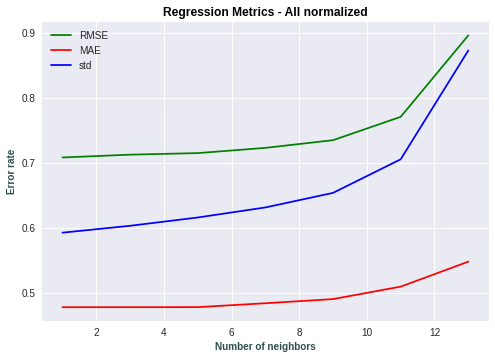

In [37]:
x_un = np.arange(1,14,2)
plt.title('Regression Metrics - All normalized', fontweight='bold', fontsize=12, color='black')
plt.plot(x_un, knn_results_un['RMSE'].sort_values(), c = 'green', label = 'RMSE')
plt.plot(x_un, knn_results_un['MAE'].sort_values(), c = 'red', label = 'MAE')
plt.plot(x_un, knn_results_un['standart deviation'].sort_values(), c = 'blue', label = 'std')
# plt.plot(x, knn_results_un['MSE'].sort_values(), c = 'blue', label = 'MSE') 
# Only the use of RMSE was chosen
#plt.axvline(x = 7, c = 'gray')
#plt.axvline(x = 1, c = 'gray')
plt.legend()
plt.ylabel('Error rate',fontweight='bold', fontsize=10, color='darkslategrey')
plt.xlabel('Number of neighbors',fontweight='bold', fontsize=10, color='darkslategrey')
plt.style.use("seaborn")
plt.show()

### Unnormalized:

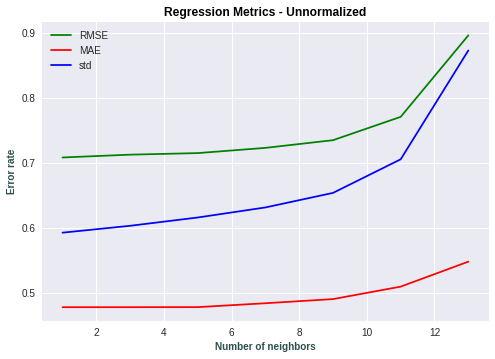

In [38]:
x_un = np.arange(1,14,2)
plt.title('Regression Metrics - Unnormalized', fontweight='bold', fontsize=12, color='black')
plt.plot(x_un, knn_results_un['RMSE'].sort_values(), c = 'green', label = 'RMSE')
plt.plot(x_un, knn_results_un['MAE'].sort_values(), c = 'red', label = 'MAE')
plt.plot(x_un, knn_results_un['standart deviation'].sort_values(), c = 'blue', label = 'std')
# plt.plot(x, knn_results_un['MSE'].sort_values(), c = 'blue', label = 'MSE') 
# Only the use of RMSE was chosen
#plt.axvline(x = 7, c = 'gray')
#plt.axvline(x = 1, c = 'gray')
plt.legend()
plt.ylabel('Error rate',fontweight='bold', fontsize=10, color='darkslategrey')
plt.xlabel('Number of neighbors',fontweight='bold', fontsize=10, color='darkslategrey')
plt.style.use("seaborn")
plt.show()

### *We can conclude that there is a difference between the data part-normalized, all-normalized and unnormalized* 

#### We can say that data all normalized isn't a better than part normalized.
#### *In this analisys `THE NORMALIZED DATA IS A BETTER CHOICE WHEN THE NEIGHBOR IS 3 AND WE SEEK FOR THE STANDARD DEVIATION SMALLER!`*